In [38]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [8]:
img = cv2.imread('/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/lisa/1229881_QDun.png')
img.shape

(1024, 1024, 3)

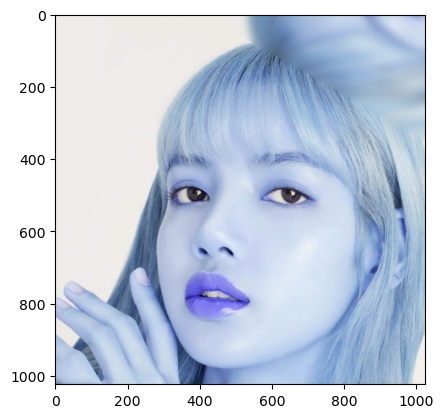

In [9]:
plt.imshow(img)

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 1024)

In [11]:
gray

array([[233, 233, 233, ..., 192, 194, 195],
       [233, 233, 233, ..., 192, 195, 196],
       [233, 233, 233, ..., 193, 195, 196],
       ...,
       [152, 150, 149, ..., 239, 239, 239],
       [149, 147, 146, ..., 239, 239, 239],
       [146, 144, 142, ..., 239, 239, 239]], dtype=uint8)

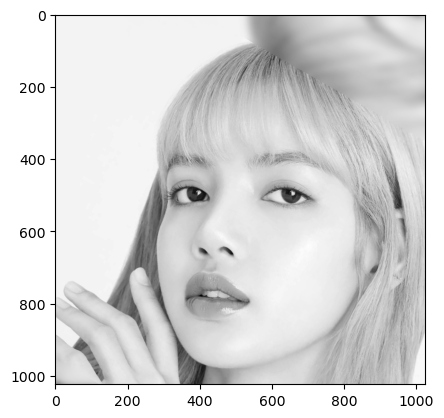

In [12]:
plt.imshow(gray, cmap='gray')

In [13]:
face_cascade = cv2.CascadeClassifier('/Users/tonytang/Desktop/BlackpinkFacialClassifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/tonytang/Desktop/BlackpinkFacialClassifier/model/opencv/haarcascades/haarcascade_eye_tree_eyeglasses.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 5)
faces

array([[111, 199, 768, 768]], dtype=int32)

In [14]:
(x, y, w, h) = faces[0]
x, y, w, h

(111, 199, 768, 768)

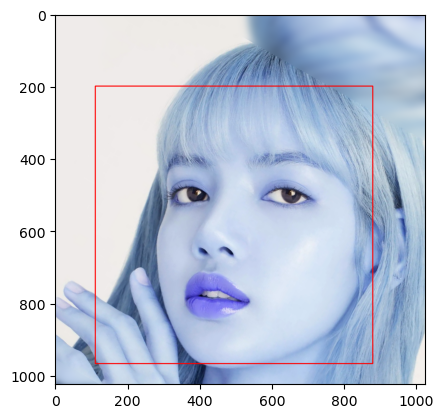

In [15]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

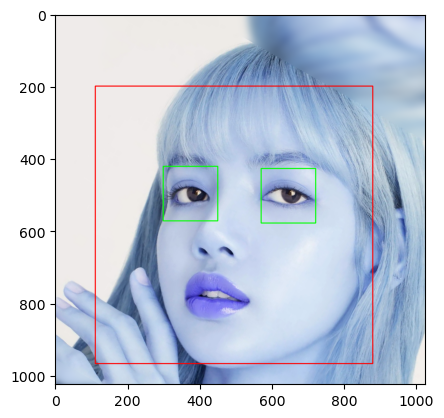

In [16]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 
                                       scaleFactor=1.4,  # Try 1.05-1.2
                                       minNeighbors=6,   # Increase to reduce false positives
                                       minSize=(30, 30))
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [17]:
eyes

array([[188, 222, 151, 151],
       [459, 228, 151, 151]], dtype=int32)

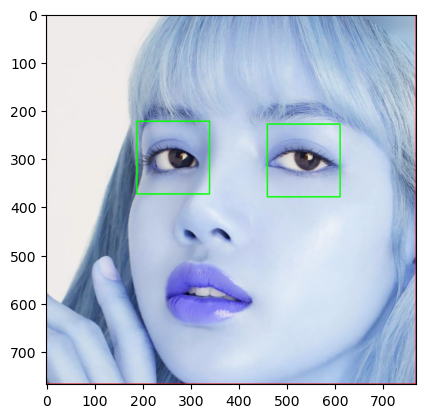

In [18]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [19]:
def get_cropped_image_if_2_eyes(image_path):
    if not os.path.isfile(image_path):
        print(f"Image not exist!!!: {image_path}")
        return None
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image load failed!!!: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

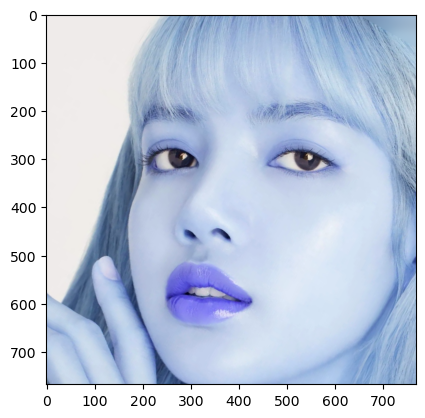

In [46]:
cropped_image = get_cropped_image_if_2_eyes('/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/lisa/1229881_QDun.png')
plt.imshow(cropped_image)

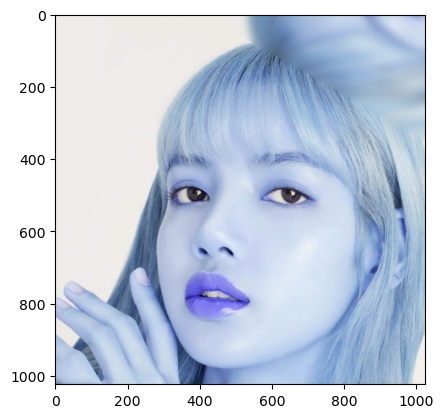

In [666]:
original_image = cv2.imread('/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/lisa/1229881_QDun.png')
plt.imshow(original_image)

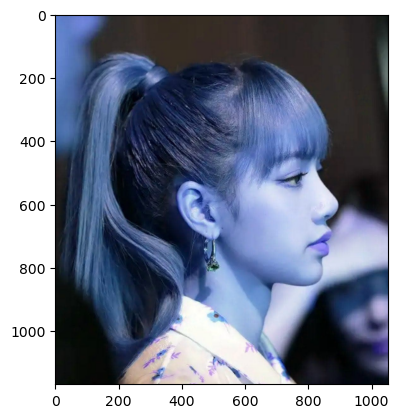

In [668]:
org_image_obstructed = cv2.imread('/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/lisa/full.jpeg')
plt.imshow(org_image_obstructed)

In [40]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/lisa/full.jpeg')
cropped_image_no_2_eyes

In [283]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

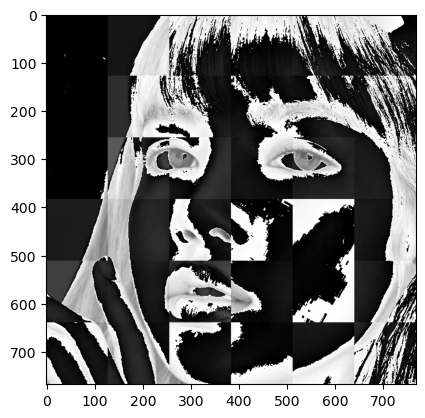

In [285]:
im_har = w2d(cropped_image,'db1',7)
plt.imshow(im_har, cmap='gray')

In [591]:
path_to_data = "/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/"
path_to_cr_data = "/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/"

In [593]:

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [595]:
img_dirs

['/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/jisoo',
 '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/jennie',
 '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/rose',
 '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/lisa']

In [597]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [599]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        if entry.name.startswith('.'):
            continue
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
        except Exception as e:
            print(f"Handle {entry.path} get wrong!!: {e}")
            continue
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo
Image load failed!!!: /Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/jisoo/https___hypebeast.com_image_2023_01_blackpink-jisoo-debut-solo-album-2023-announcement-info-0000.avif
Image load failed!!!: /Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/jisoo/https___hypebeast.com_wp-content_blogs.dir_6_files_2023_03_blackpink-jisoo-emo-FI-1.avif
Generating cropped images in folder:  /Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jennie
Generating cropped images in folder:  /Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/rose
Generating cropped images in folder:  /Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/lisa


In [674]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        if not entry.name.startswith('.'):
            file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'jisoo': ['/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo39.png',
  '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo11.png',
  '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo10.png',
  '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo38.png',
  '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo1.png',
  '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo3.png',
  '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo12.png',
  '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo13.png',
  '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo2.png',
  '/Users/tonytang/Desktop/BlackpinkFacialClassifier/images_dataset/cropped/jisoo/jisoo6.png',
  '/Users/tonytang/Desktop/Blackpin

In [613]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'jisoo': 0, 'jennie': 1, 'rose': 2, 'lisa': 3}

In [615]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [616]:
len(X)

150

In [619]:
X

[array([[23],
        [19],
        [24],
        ...,
        [11],
        [44],
        [ 5]], dtype=uint8),
 array([[ 47],
        [ 52],
        [ 59],
        ...,
        [247],
        [159],
        [ 60]], dtype=uint8),
 array([[235],
        [233],
        [229],
        ...,
        [198],
        [  2],
        [ 13]], dtype=uint8),
 array([[197],
        [191],
        [181],
        ...,
        [240],
        [ 10],
        [249]], dtype=uint8),
 array([[148],
        [155],
        [164],
        ...,
        [245],
        [ 17],
        [  1]], dtype=uint8),
 array([[22],
        [21],
        [18],
        ...,
        [ 1],
        [ 0],
        [ 0]], dtype=uint8),
 array([[14],
        [16],
        [61],
        ...,
        [ 0],
        [72],
        [ 0]], dtype=uint8),
 array([[ 90],
        [ 85],
        [ 83],
        ...,
        [235],
        [180],
        [ 12]], dtype=uint8),
 array([[ 53],
        [ 57],
        [ 68],
        ...,
        [254],
 

In [621]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(150, 4096)

In [623]:
X[0]

array([23., 19., 24., ..., 11., 44.,  5.])

In [625]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [627]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8157894736842105

In [629]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.64      0.82      0.72        11
           2       0.75      0.67      0.71         9
           3       1.00      1.00      1.00         6

    accuracy                           0.82        38
   macro avg       0.85      0.83      0.83        38
weighted avg       0.84      0.82      0.82        38



In [638]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [640]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [642]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.776285,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.686561,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.766798,{'logisticregression__C': 1}


In [644]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [646]:
best_estimators['svm'].score(X_test,y_test)

0.8157894736842105

In [648]:
best_estimators['random_forest'].score(X_test,y_test)

0.7631578947368421

In [650]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8421052631578947

In [652]:
best_clf = best_estimators['logistic_regression']

In [654]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  2,  0,  0],
       [ 1,  9,  1,  0],
       [ 0,  2,  7,  0],
       [ 0,  0,  0,  6]])

Text(95.72222222222221, 0.5, 'Truth')

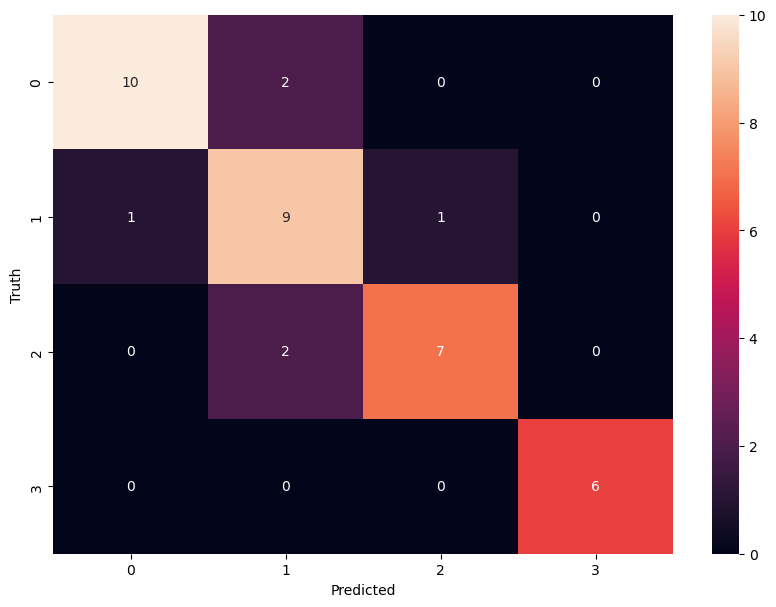

In [656]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [658]:
class_dict

{'jisoo': 0, 'jennie': 1, 'rose': 2, 'lisa': 3}

In [660]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [662]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))